In [106]:
import numpy as np
from numpy import save
import matplotlib.pyplot as plt

In [77]:
#should make the train sets have a 50/50 split between grass type or not
X_train = np.load("../data/train_set/vectorized/X_train_preprocessed.npy")
X_train_modified = np.load("../data/train_set/vectorized/X_train_modified_preprocessed.npy")
X_test = np.load("../data/test_set/vectorized/X_test_preprocessed.npy")
Y_train = np.load("../data/train_set/vectorized/Y_train.npy")
Y_train_modified = np.load("../data/train_set/vectorized/Y_train_modified.npy")
Y_test = np.load("../data/test_set/vectorized/Y_test.npy")

In [78]:
def initialize_parameters(layer_dims):
    parameters = {}
    L = len(layer_dims) - 1

    for i in range(L):
        parameters["W" + str(i + 1)] = np.random.randn(layer_dims[i + 1], layer_dims[i]) * 0.01
        parameters["b" + str(i + 1)] = np.zeros([layer_dims[i + 1], 1]) * 0.01
    
    return parameters

In [79]:
def linear_forward(A_prev, W, b):
    Z = np.dot(W, A_prev) + b
    return Z, W, A_prev

#using a ReLU activation function
def activation_forward(Z):
    A = np.maximum(0, Z)
    return A

def model_forward(X, parameters):
    caches = []
    A_prev = X

    #propagates through every layer except last, since the last one will use the sigmoid activation function
    for i in range((len(parameters) // 2) - 1):
        Z, W, A_prev = linear_forward(A_prev, parameters["W" + str(i + 1)], parameters["b" + str(i + 1)])
        A = activation_forward(Z)
        caches.append([Z, W, A_prev])
        A_prev = A
    
    #output layer
    Z_last, W_last, A_prev_last = linear_forward(A_prev, parameters["W" + str(len(parameters) // 2)], parameters["b" + str(len(parameters) // 2)])
    Al = 1 / (1 + np.exp(-Z_last))
    caches.append([Z_last, W_last, A_prev_last])

    return caches, Al

In [80]:
def compute_cost(Al, Y):
    # Al = caches[len(caches) - 1][3]
    m = Al.shape[1]
    cost = np.squeeze((-1/m) * (np.dot(Y, np.log(Al + 1e-8).T) + np.dot([1] - Y, np.log([1] - Al + 1e-8).T)))
    return cost

In [81]:
def linear_backward(dZ, respective_cache):
    A_prev = respective_cache[2]
    W = respective_cache[1]
    m = A_prev.shape[1]
    dW = (1 / m) * np.dot(dZ, A_prev.T)
    db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    return dW, db, dA_prev

#for ReLU activations
def activation_backward(dA, respective_cache):
    Z = respective_cache[0]
    dZ = dA * ((Z > 0) * 1)
    return dZ

def model_backward(caches, Y, Al):
    derivatives = {}
    L = len(caches)

    #computes the derivative for the last layer as follows because it is using a sigmoid activation
    dZ_L = Al - Y
    dW_L, db_L, dA_L = linear_backward(dZ_L, caches[L - 1])
    derivatives["dW" + str(L)] = dW_L
    derivatives["db" + str(L)] = db_L

    dA = dA_L
    #goes through every hidden layer
    for i in reversed(range(L - 1)):
        dZ = activation_backward(dA, caches[i])
        dW, db, dA_prev = linear_backward(dZ, caches[i])
        derivatives["dW" + str(i + 1)] = dW
        derivatives["db" + str(i + 1)] = db
        dA = dA_prev

    return derivatives

In [82]:
def update_parameters(parameters, derivatives, learning_rate):
    for i in range(len(parameters) // 2):
        parameters["W" + str(i + 1)] = parameters["W" + str(i + 1)] - (learning_rate * derivatives["dW" + str(i + 1)])
        parameters["b" + str(i + 1)] = parameters["b" + str(i + 1)] - (learning_rate * derivatives["db" + str(i + 1)])
    return parameters

In [83]:
def model(X, Y, layer_dims, num_iterations, learning_rate):
    parameters = initialize_parameters(layer_dims)

    costs = []
    k = 0
    while k < num_iterations:
        caches, Al = model_forward(X, parameters)
        derivatives = model_backward(caches, Y, Al)
        parameters = update_parameters(parameters, derivatives, learning_rate)

        if (k + 1) % 100 == 0  or k == num_iterations - 1:
            cost = compute_cost(Al, Y)
            costs.append(cost)
            print("Cost at iteration " + str(k + 1) + " is " + str(cost))
            
        k += 1
    return parameters, costs

In [84]:
def plot_costs(costs, learning_rate):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

In [85]:
def predict_accuracy(X, Y, parameters):
    caches, Al = model_forward(X, parameters)
    m = Al.shape[1]
    Al = (Al >= 0.5) * 1
    accuracy = np.squeeze(100 * (1 - (np.sum(np.abs(Al - Y), axis=1) / m)))
    return accuracy

Cost at iteration 100 is 0.26214333101478304
Cost at iteration 200 is 0.1740035978318785
Cost at iteration 300 is 0.12535269328702667
Cost at iteration 400 is 0.09726733599262402
Cost at iteration 500 is 0.07991568440968004
Cost at iteration 600 is 0.071822051737901
Cost at iteration 700 is 0.06741231550515568
Cost at iteration 800 is 0.06095638640281979
Cost at iteration 900 is 0.05836261849022467
Cost at iteration 1000 is 0.05360074232371906
Cost at iteration 1100 is 0.0522441901674785
Cost at iteration 1200 is 0.04822988183511515
Cost at iteration 1300 is 0.046560422687462834
Cost at iteration 1400 is 0.04366654619216789
Cost at iteration 1500 is 0.04174934111047348
Cost at iteration 1600 is 0.03993417676346283
Cost at iteration 1700 is 0.03805900513854389
Cost at iteration 1800 is 0.03640999623085631
Cost at iteration 1900 is 0.03468725650820562
Cost at iteration 2000 is 0.033143555261479454


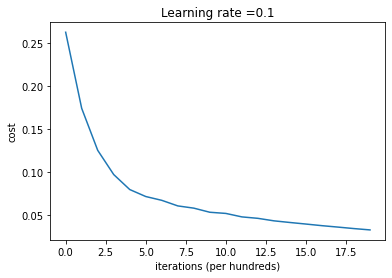

train accuracy = 100.0%
test accuracy = 86.0%
50/50 set accuracy = 100.0%


In [101]:
#using the model, 43200 because that is the dimension of the image vector
parameters, costs = model(X_train, Y_train, [43200, 4, 1], 2000, 0.1)

plot_costs(costs, 0.1)

train_accuracy = predict_accuracy(X_train, Y_train, parameters)
fifty_fifty_accuracy = predict_accuracy(X_train_modified, Y_train_modified, parameters)
test_accuracy = predict_accuracy(X_test, Y_test, parameters)

print("train accuracy = " + str(train_accuracy) + "%" )
print("test accuracy = " + str(test_accuracy) + "%")
print("50/50 set accuracy = " + str(fifty_fifty_accuracy) + "%")

In [108]:
print(parameters)
save("parameters.npy", parameters)

{'W1': array([[-0.00236667, -0.00952643,  0.00760227, ...,  0.00661184,
         0.00667944,  0.00560862],
       [ 0.01725557,  0.0033097 ,  0.00209837, ..., -0.03464234,
         0.02370117,  0.01019477],
       [-0.00514491,  0.00389029, -0.00350725, ..., -0.02126386,
        -0.01066335, -0.00984801],
       [-0.01444667, -0.00772241, -0.00140231, ...,  0.00147122,
         0.0017859 ,  0.00300048]]), 'b1': array([[0.0527809 ],
       [0.03053222],
       [0.01349824],
       [0.13501488]]), 'W2': array([[-0.32535322, -0.48439562, -0.27198192, -1.56931809]]), 'b2': array([[2.41649667]])}


In [110]:
list = np.load("parameters.npy", allow_pickle=True)
print(list)

{'W1': array([[-0.00236667, -0.00952643,  0.00760227, ...,  0.00661184,
         0.00667944,  0.00560862],
       [ 0.01725557,  0.0033097 ,  0.00209837, ..., -0.03464234,
         0.02370117,  0.01019477],
       [-0.00514491,  0.00389029, -0.00350725, ..., -0.02126386,
        -0.01066335, -0.00984801],
       [-0.01444667, -0.00772241, -0.00140231, ...,  0.00147122,
         0.0017859 ,  0.00300048]]), 'b1': array([[0.0527809 ],
       [0.03053222],
       [0.01349824],
       [0.13501488]]), 'W2': array([[-0.32535322, -0.48439562, -0.27198192, -1.56931809]]), 'b2': array([[2.41649667]])}
